Homework 2

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
import pandas as pd
import numpy as np
!pip install wget
import wget
url = wget.download(data)

100% [..........................................................................] 1423529 / 1423529

In [4]:
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

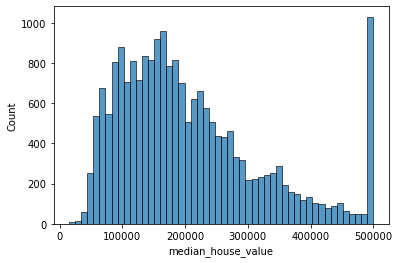

In [6]:
sns.histplot(df['median_house_value'],bins=50)

In [7]:
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [8]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Question 1

In [9]:
df.isnull().sum()
# 207 missing value

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2

In [10]:
np.median(df['population'])
# median: 1166

1166.0

In [11]:
np.random.seed(42)
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [12]:
y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Question 3

Option 1 : Fill missing values with 0

In [13]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
10292,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327
16722,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798
11730,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
5993,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566


In [14]:
def train_linear_regression(X, y, r = 0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [15]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [16]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [17]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [18]:
def rmse(y,y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [19]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.33

Option 2: Fill in missing values with mean

In [20]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [21]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [22]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)
# Both are equally good 

0.33

Question 4

In [23]:
value_list = []
for r in [0,0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train, r)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    value = round(rmse(y_val, y_pred),2)
    value_list.append(value)
print(value_list)
# 0 is the smallest r that satisfies the condition. 

[0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34]


Question 5

In [28]:
second_list = []
for k in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(k)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train['median_house_value'].values
    y_val_orig = df_val['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    value_1 = rmse(y_val, y_pred)
    second_list.append(value_1)

print(round(np.std(second_list), 3))

0.004


Question 6

In [30]:
for k in [9]:    
    np.random.seed(k)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values

    y_train = np.log1p(df_train['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train)
    X_test = prepare_X(df_test)
    w_0, w = train_linear_regression(X_train, y_train, 0.001)
    y_pred = w_0 + X_test.dot(w)
    value_1 = rmse(y_test, y_pred)
    print(value_1)


0.3452664315964517
